In [73]:
 # Import Python libaries
%matplotlib inline
from scipy.optimize import curve_fit
import time as time
# General data management
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rc, rcParams

import seaborn as sns
#import xgboost as xgb
#from xgboost import XGBRegressor
from sklearn import linear_model
from sklearn import ensemble
#from xgboost import plot_tree
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
# import pydo
# generate random integer values
from random import seed
from random import randint
# seed random number generator
seed(1)
# Machine learning & model visualization tools
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, LeaveOneOut
from sklearn.metrics import r2_score, mean_squared_error, mean_gamma_deviance, mean_absolute_error
from sklearn.tree import export_graphviz
from sklearn import svm
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from numpy import cov
from scipy.stats import pearsonr
from scipy import ndimage, misc
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from scipy import stats 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
# from sklearn.externals import joblib
# Miscellaneous
import os
import io
#import pydot
import math
from sklearn.datasets import make_friedman2
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.gaussian_process.kernels import RBF, ConstantKernel
from sklearn.gaussian_process.kernels import Matern as MaternKernel, _check_length_scale

from autooed.utils.pareto import convert_minimization
from pymoo.performance_indicator.hv import Hypervolume
from autooed.utils.pareto import find_pareto_front
from scipy.interpolate import BSpline, make_interp_spline

from autooed.utils.plot import plot_performance_space, plot_performance_metric, plot_performance_space_diffcolor
global_split_rand = 2571


Text(0.5, 0, '!!!Ariaaaal')

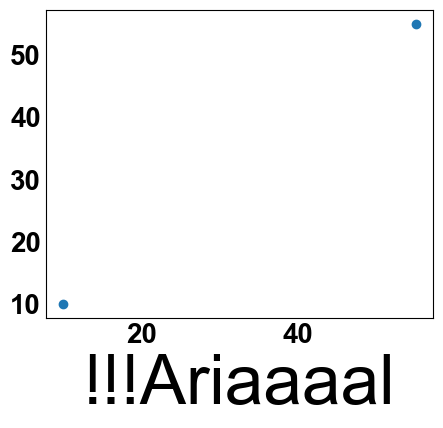

In [74]:
# check the font !!!!!!!!!!!!!!!!!!!!!
# switch to Arial
# if not working: delet ~/.catch/matplotlib
plt.rcParams["font.family"] = "Arial"
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.fonttype'] = 42
mpl.font_manager.FontManager()

rc('font', weight='bold')
fig, ax = plt.subplots(figsize=(5, 4))
plt.scatter([10, 55], [10, 55])
ax.tick_params(axis='both', length=0, width=1.5, colors='black', grid_alpha=0, labelsize=20)
plt.xlabel('!!!Ariaaaal', fontname='Arial', fontsize=50)

# Fix the samples that rounding resulted in negative values for the last one.
 #97:  [ 0.31	0.09	0.20	0.40	0.01	-1.000000e-02 generated one]
 real one: [0.30701378 0.08708877 0.19961717 0.39865702 0.00716017]
 evaluated one:  [0.31 0.09 0.2 0.4 0.0 0.0]

In [75]:
# Fix the samples that rounding resulted in 
df_eval = pd.read_csv('new_evaluated_nonzero.csv',)
#df_eval_nozero = pd.read_csv('new_evaluated_nonzero.csv',)

df_init = pd.read_csv('./Yuchao_20220816_nonzero.csv',)
df_eval ['sample'] = list(range(len(df_init)+1, len(df_init) + len(df_eval) + 1))

df_eval['R6(IBOA)'].loc[df_eval['sample']==97] = 0.0
df_eval['R5(HEAA)'].loc[df_eval['sample']==97] = 0.0
df_eval ['Toughness(MJ/m3)'] = -df_eval ['Toughness(MJ/m3)']
df_eval ['Tensile_Strength(MPa)'] = -df_eval ['Tensile_Strength(MPa)']
#df_eval.rename(columns={"A": "a", "B": "c"})
#print (df_eval)

/tmp/ipykernel_8164/255840500.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eval['R6(IBOA)'].loc[df_eval['sample']==97] = 0.0
/tmp/ipykernel_8164/255840500.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eval['R5(HEAA)'].loc[df_eval['sample']==97] = 0.0


In [76]:
df_init.shape


(36, 16)

In [77]:
cols = df_eval.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_eval = df_eval [cols]
r6 = round(1-df_eval['R1(HA)'] -df_eval['R2(IA)'] -df_eval['R3(NVP)']  -df_eval['R4(AA)'] -df_eval['R5(HEAA)'], 2)
df_eval ["R6(IBOA)"] = r6
df_eval ['sum'] = df_eval ['R1(HA)']+\
                 df_eval ['R2(IA)']+\
            df_eval ['R3(NVP)']+\
           df_eval ['R4(AA)']+\
                df_eval['R5(HEAA)']  +\
                  df_eval['R6(IBOA)'] 

In [78]:
x_eval = df_eval.iloc[:, 1:6]
x_init = df_init.iloc[:, 1:6]

In [79]:
# TSNE Dimension Reduction
tsne = TSNE(init='pca', n_iter=10000, learning_rate='auto', perplexity=5
, random_state=4, verbose=1)
x_eval_tsne = tsne.fit_transform(x_eval)
x_init_tsne = tsne.fit_transform(x_init)

df_eval ['tsne1'] = x_eval_tsne[:, 0]
df_eval ['tsne2'] = x_eval_tsne[:, 1]

df_init ['tsne1'] = x_init_tsne[:, 0]
df_init ['tsne2'] = x_init_tsne[:, 1]


[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 70 samples in 0.000s...
[t-SNE] Computed neighbors for 70 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 70 / 70
[t-SNE] Mean sigma: 0.089525
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.499573
[t-SNE] KL divergence after 9550 iterations: 0.450232
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 36 samples in 0.000s...
[t-SNE] Computed neighbors for 36 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 36 / 36
[t-SNE] Mean sigma: 0.117108
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.768929
[t-SNE] KL divergence after 900 iterations: 0.274458


In [80]:
# PCA Dimension Reduction
pca = PCA(n_components=2)

x_eval_pca = pca.fit_transform(x_eval)
x_init_pca = pca.fit_transform(x_init)

df_eval ['pca1'] = x_eval_pca[:, 0]
df_eval ['pca2'] = x_eval_pca[:, 1]

df_init ['pca1'] = x_init_pca[:, 0]
df_init ['pca2'] = x_init_pca[:, 1]

In [81]:
df_init['Printability'] = df_init['Printability'].map(dict(Y=1, N=0))

In [82]:
df_eval['initial'] = 'Eval.'
df_init['initial'] = 'Initial'
df = pd.concat([df_init, df_eval], axis=0)
X = df.iloc[:, 1:6]

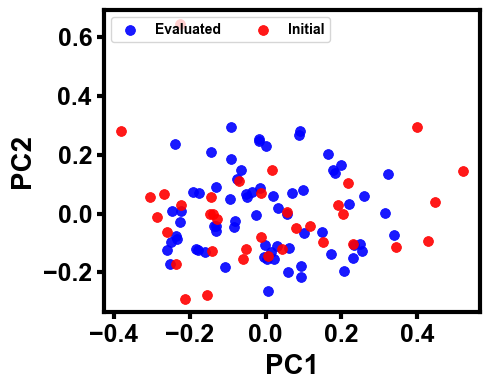

In [83]:
fig, ax = plt.subplots(figsize=(5, 4))
markers = ['o', 's', '*', 'v']
#['*', 's', 'o', 'v']
sns.scatterplot(data=df_eval, x='pca1', y='pca2', 
                 markers='*', edgecolor=None, color='blue', 
             alpha=0.9, s=50,  label='Evaluated')

sns.scatterplot(data=df_init, x='pca1', y='pca2', 
                 markers=markers, edgecolor=None, color='red',
             alpha=0.9, s=50,  label='Initial')

ax.set_xlabel('PC1', fontsize='20', fontname='Arial', fontweight='bold', labelpad=5)
ax.set_ylabel('PC2', fontsize='20', fontname='Arial', fontweight='bold', labelpad=5)

ax.tick_params(direction='out', length=5, width=3, colors='black', 
               grid_alpha=1, labelsize='18')

[i.set_linewidth(3) for i in ax.spines.values()]
plt.legend(ncol=2, loc='upper left')
plt.tight_layout()
#plt.title ('per {}, rand {}'.format(per, rand))
#plt.ylim(-25, 45)
plt.savefig('eval_init_samples_pca.jpeg', dpi=500)

In [84]:
"""
# do not delet the non-printable cases.
fig, ax = plt.subplots(figsize=(6, 4))
hue = df['initial'].astype(str) + ', ' + df['Printability'].astype(str)

label = ['Init., Printable','Init., Non-printable', 'Eval., Printable','Eval., Non-printable']
sns.scatterplot(data=df, x='pca1', y='pca2', 
                 markers=['o', 'o', '*', '*'], edgecolor=None, palette=['blue', 'orange', 'magenta', 'orange'], hue=hue, style=hue,#hue='initial',
             alpha=0.9, s=50,  )#label='Evaluated')
plt.ylim(-0.7, 0.7)


plt.legend(ncol=2, title='1=Printable; 0=Non-printable', framealpha=1)

ax.set_xlabel('PC1', fontsize='20', fontname='Arial', fontweight='bold', labelpad=5)
ax.set_ylabel('PC2', fontsize='20', fontname='Arial', fontweight='bold', labelpad=5)

ax.tick_params(direction='out', length=5, width=3, colors='black', 
               grid_alpha=1, labelsize='18')

[i.set_linewidth(3) for i in ax.spines.values()]

plt.tight_layout()
#plt.title ('per {}, rand {}'.format(per, rand))
#plt.ylim(-25, 45)
plt.savefig('pca_printable_non.jpeg', dpi=500)
"""

"\n# do not delet the non-printable cases.\nfig, ax = plt.subplots(figsize=(6, 4))\nhue = df['initial'].astype(str) + ', ' + df['Printability'].astype(str)\n\nlabel = ['Init., Printable','Init., Non-printable', 'Eval., Printable','Eval., Non-printable']\nsns.scatterplot(data=df, x='pca1', y='pca2', \n                 markers=['o', 'o', '*', '*'], edgecolor=None, palette=['blue', 'orange', 'magenta', 'orange'], hue=hue, style=hue,#hue='initial',\n             alpha=0.9, s=50,  )#label='Evaluated')\nplt.ylim(-0.7, 0.7)\n\n\nplt.legend(ncol=2, title='1=Printable; 0=Non-printable', framealpha=1)\n\nax.set_xlabel('PC1', fontsize='20', fontname='Arial', fontweight='bold', labelpad=5)\nax.set_ylabel('PC2', fontsize='20', fontname='Arial', fontweight='bold', labelpad=5)\n\nax.tick_params(direction='out', length=5, width=3, colors='black', \n               grid_alpha=1, labelsize='18')\n\n[i.set_linewidth(3) for i in ax.spines.values()]\n\nplt.tight_layout()\n#plt.title ('per {}, rand {}'.forma

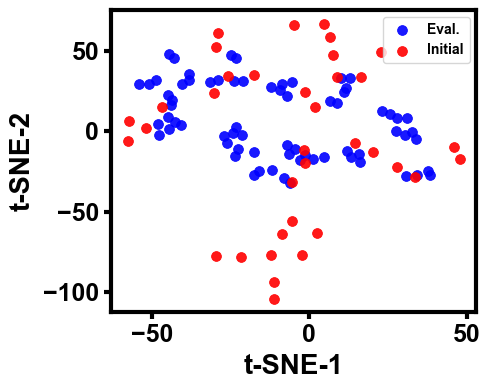

In [85]:
fig, ax = plt.subplots(figsize=(5, 4))
markers = ['o', 's', '*', 'v']
#['*', 's', 'o', 'v']
sns.scatterplot(data=df_eval, x='tsne1', y='tsne2', 
                 markers='*', edgecolor=None, color='blue',
             alpha=0.9, s=50, label='Eval.')

sns.scatterplot(data=df_init, x='tsne1', y='tsne2', 
                 markers=markers, edgecolor=None, color='red',
             alpha=0.9, s=50, label='Initial')
plt.legend()

ax.set_xlabel('t-SNE-1', fontsize='20', fontname='Arial', fontweight='bold', labelpad=5)
ax.set_ylabel('t-SNE-2', fontsize='20', fontname='Arial', fontweight='bold', labelpad=5)

ax.tick_params(direction='out', length=5, width=3, colors='black', 
               grid_alpha=1, labelsize='18')

[i.set_linewidth(3) for i in ax.spines.values()]

plt.tight_layout()
#plt.title ('per {}, rand {}'.format(per, rand))
#plt.ylim(-25, 45)
plt.savefig('eval_init_samples_tsne.jpeg', dpi=500)

In [86]:
# PCA Dimension Reduction
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X)

df ['pca1'] = x_pca[:, 0]
df ['pca2'] = x_pca[:, 1]


Compiled modules for significant speedup can not be used!
https://pymoo.org/installation.html#installation

To disable this warning:
from pymoo.configuration import Configuration
Configuration.show_compile_hint = False



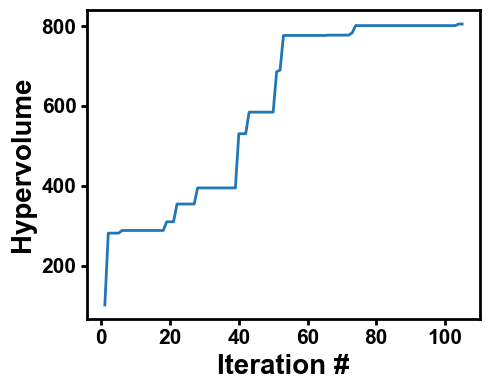

In [87]:
Strength = -df['Tensile_Strength(MPa)']
Toughness = -df['Toughness(MJ/m3)']
Y = []
for i, j in zip(Strength, Toughness):
    Y.append([i, j])
Y = np.array(Y)
plot_performance_metric (Y, ['min', 'min'])

In [88]:
Y_eval.shape

NameError: name 'Y_eval' is not defined

In [89]:
# calculate the Pareto Front
pareto = find_pareto_front(Y)
pareto

array([[-49.99,  -2.75],
       [-32.03,  -7.58],
       [-31.22, -22.56],
       [-17.82, -25.02],
       [-15.1 , -25.76]])

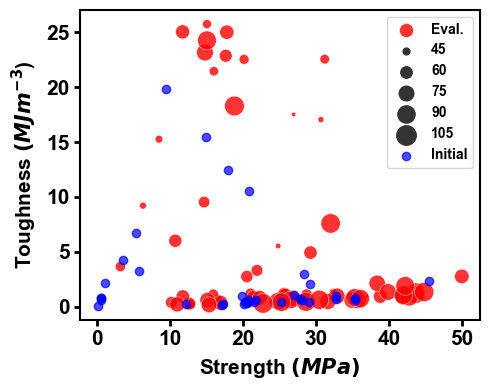

In [90]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.scatterplot (x='Tensile_Strength(MPa)', y='Toughness(MJ/m3)', size='sample', color='red', sizes=(1, 200), label='Eval.',
                 alpha=.8, palette=["red"], data=df_eval)
plt.scatter (df_init['Tensile_Strength(MPa)'], df_init['Toughness(MJ/m3)'], label='Initial', 
             alpha=0.7, color='blue',)
plt.legend()
#plt.legend(['','','','','', 
 #           'Eval.','Init.'])


ax.set_xlabel('Strength $(MPa)$', fontsize='15', fontname='Arial', fontweight='bold', labelpad=5)
ax.set_ylabel('Toughness $({MJ}{m^{-3}}$)', fontsize='15', fontname='Arial', fontweight='bold', labelpad=5)

ax.tick_params(direction='out', length=4, width=2, colors='black', 
               grid_alpha=1, labelsize='15')
#plt.scatter (-pareto[:, 0], -pareto[:, 1], facecolors='none', edgecolors='black')

[i.set_linewidth(1.5) for i in ax.spines.values()]
plt.tight_layout()
plt.savefig('evaluate_init.png', dpi=500)

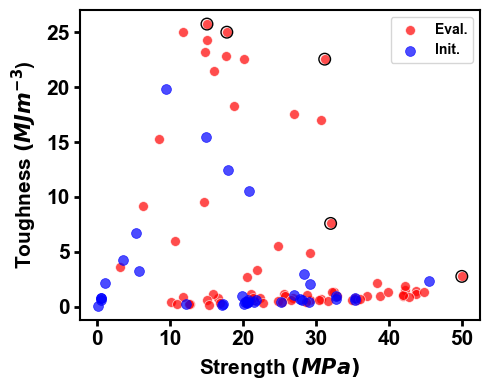

In [91]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.scatterplot (x='Tensile_Strength(MPa)', y='Toughness(MJ/m3)', color='red', s=50, label='Eval.',
                 alpha=.7, palette=["red"], data=df_eval)

sns.scatterplot (x='Tensile_Strength(MPa)', y='Toughness(MJ/m3)', color='blue', s=50, label='Init.', edgecolor=None, 
                 alpha=.7, palette=["blue"], data=df_init)
plt.legend()
ax.set_xlabel('Strength $(MPa)$', fontsize='15', fontname='Arial', fontweight='bold', labelpad=5)
ax.set_ylabel('Toughness $({MJ}{m^{-3}}$)', fontsize='15', fontname='Arial', fontweight='bold', labelpad=5)

ax.tick_params(direction='out', length=4, width=2, colors='black', 
               grid_alpha=1, labelsize='15')
plt.scatter (-pareto[:, 0], -pareto[:, 1], facecolors='none', s=70, edgecolors='black', alpha=1)

[i.set_linewidth(1.5) for i in ax.spines.values()]
plt.tight_layout()
plt.savefig('evaluate_init_pareto_nosize.png', dpi=500)

In [92]:
def calc_hypervolume(Y, ref_point, obj_type=None):
    '''
    Calculate hypervolume
    '''
    #Y = convert_minimization(Y, obj_type)

    return Hypervolume(ref_point=ref_point).calc(Y)

hypervolume = calc_hypervolume (Y, (0, 0), )
print (hypervolume)

814.8641999999999


In [93]:
Strength = df_init['Tensile_Strength(MPa)']
Toughness = df_init['Toughness(MJ/m3)']
Y_initial = []
for i, j in zip(Strength, Toughness):
    Y_initial.append([i, j])
Y_initial = np.array(Y_initial)
Y_initial

array([[45.51,  2.33],
       [17.95, 12.47],
       [32.74,  0.69],
       [27.81,  0.7 ],
       [ 1.2 ,  2.15],
       [28.33,  2.97],
       [20.54,  0.32],
       [27.03,  1.05],
       [35.42,  0.64],
       [21.52,  0.4 ],
       [20.23,  0.23],
       [29.07,  0.45],
       [20.54,  0.41],
       [17.16,  0.17],
       [19.83,  0.99],
       [29.19,  2.06],
       [ 5.35,  6.68],
       [32.72,  0.93],
       [20.8 , 10.57],
       [25.27,  0.38],
       [20.76,  0.62],
       [14.97, 15.49],
       [20.74,  0.37],
       [ 5.83,  3.27],
       [20.33,  0.41],
       [28.13,  0.59],
       [21.79,  0.6 ],
       [ 9.55, 19.8 ],
       [ 3.67,  4.28],
       [ 0.57,  0.75],
       [ 0.53,  0.77],
       [ 0.59,  0.6 ],
       [ 0.2 ,  0.09],
       [35.33,  0.78],
       [17.35,  0.24],
       [12.22,  0.24]])

In [94]:
Strength = df_eval['Tensile_Strength(MPa)']
Toughness = df_eval['Toughness(MJ/m3)']
Y_eval = []
for i, j in zip(Strength, Toughness):
    Y_eval.append([i, j])
Y_eval = np.array(Y_eval)
Y_eval

array([[29.22,  0.62],
       [30.68,  0.7 ],
       [36.98,  0.94],
       [26.97, 17.53],
       [32.56,  1.35],
       [24.84,  5.53],
       [30.7 , 17.05],
       [32.28,  1.33],
       [ 6.34,  9.2 ],
       [20.44,  0.53],
       [ 8.53, 15.26],
       [16.59,  0.75],
       [21.56,  0.59],
       [42.27,  1.49],
       [15.1 , 25.76],
       [16.05, 21.46],
       [31.22, 22.56],
       [20.18, 22.54],
       [ 3.25,  3.64],
       [15.97,  1.12],
       [12.83,  0.23],
       [21.08,  1.18],
       [28.74,  1.09],
       [14.71,  9.53],
       [21.95,  3.3 ],
       [10.24,  0.38],
       [20.56,  2.74],
       [12.7 ,  0.26],
       [25.61,  1.15],
       [17.67, 22.87],
       [10.77,  6.  ],
       [29.27,  4.92],
       [11.8 ,  0.91],
       [38.83,  0.92],
       [21.46,  0.81],
       [11.76, 25.05],
       [17.82, 25.02],
       [49.99,  2.75],
       [22.32,  0.8 ],
       [16.94,  0.34],
       [11.03,  0.2 ],
       [15.17,  0.59],
       [25.8 ,  0.97],
       [26.

In [95]:
X = np.array (X)

In [96]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [97]:
Y

array([[-45.51,  -2.33],
       [-17.95, -12.47],
       [-32.74,  -0.69],
       [-27.81,  -0.7 ],
       [ -1.2 ,  -2.15],
       [-28.33,  -2.97],
       [-20.54,  -0.32],
       [-27.03,  -1.05],
       [-35.42,  -0.64],
       [-21.52,  -0.4 ],
       [-20.23,  -0.23],
       [-29.07,  -0.45],
       [-20.54,  -0.41],
       [-17.16,  -0.17],
       [-19.83,  -0.99],
       [-29.19,  -2.06],
       [ -5.35,  -6.68],
       [-32.72,  -0.93],
       [-20.8 , -10.57],
       [-25.27,  -0.38],
       [-20.76,  -0.62],
       [-14.97, -15.49],
       [-20.74,  -0.37],
       [ -5.83,  -3.27],
       [-20.33,  -0.41],
       [-28.13,  -0.59],
       [-21.79,  -0.6 ],
       [ -9.55, -19.8 ],
       [ -3.67,  -4.28],
       [ -0.57,  -0.75],
       [ -0.53,  -0.77],
       [ -0.59,  -0.6 ],
       [ -0.2 ,  -0.09],
       [-35.33,  -0.78],
       [-17.35,  -0.24],
       [-12.22,  -0.24],
       [-29.22,  -0.62],
       [-30.68,  -0.7 ],
       [-36.98,  -0.94],
       [-26.97, -17.53],


In [98]:
Y = -Y

In [99]:
np.min(Y_eval[:, 0])

3.25

In [100]:
(np.sqrt(1e-2), np.sqrt(1e4))

(0.1, 100.0)

In [110]:
main_kernel = MaternKernel(length_scale=np.ones(5), 
                           length_scale_bounds=(0.04, 10),
                           nu=2.5
                           )

errors_strength0 = []
pred_strength = []
for i in range (0, len(Y_eval)):
        gpr_strength = GaussianProcessRegressor(kernel=main_kernel,
                random_state=0).fit(X[0:len(Y_initial)+i, :], Y[0:len(Y_initial)+i, 0])
        
        x_next = np.array (X[len(Y_initial) + i, :])
        x_next = x_next.reshape (1, 5)
        y_next = np.array (Y[len(Y_initial) + i, 0])
        y_next = y_next.reshape(1, 1)
        #score_strength = gpr_strength.score(x_next, y_next)
        #print (score_strength)
        
        gpr_strength_predict = gpr_strength.predict(x_next, return_std=False)
        pred_strength.append([gpr_strength_predict[0], y_next[0][0]])

        #print (gpr_strength_predict, y_next)
        
        error = abs(gpr_strength_predict - y_next)/y_next
        
        #print (error)
        errors_strength0.append(error)


main_kernel = MaternKernel(length_scale=np.ones(5), 
                           length_scale_bounds=(0.1, 100),
                           nu=1.5
                           )
errors_toughness0 = []
pred_toughness = []
for i in range (0, len(Y_eval)):
        gpr_toughness = GaussianProcessRegressor(kernel=main_kernel,
                random_state=0).fit(X[0:len(Y_initial)+i, :], Y[0:len(Y_initial)+i, 1])
        
        x_next = np.array (X[len(Y_initial) + i, :])
        x_next = x_next.reshape (1, 5)
        y_next = np.array (Y[len(Y_initial) + i, 1])
        y_next = y_next.reshape(1, 1)
        #score_toughness = gpr_toughness.score(x_next, y_next)
        #print (score_toughness)
        gpr_toughness_predict = gpr_toughness.predict(x_next, return_std=False)
        pred_toughness.append([gpr_toughness_predict[0], y_next[0][0]])
        #print (gpr_toughness_ppred_strength
        error = abs(gpr_toughness_predict - y_next)/(y_next+1)
        errors_toughness0.append(error)

[gpr_toughness_predict[0], y_next[0][0]]

[1.9603621655311416, 18.29]

PearsonRResult(statistic=0.3710208431290365, pvalue=0.0015670668153018362)


PearsonRResult(statistic=0.5836108986813605, pvalue=1.1420783092518811e-07)

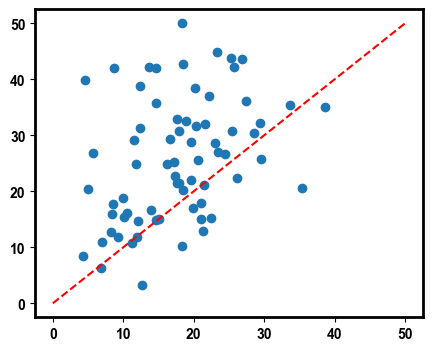

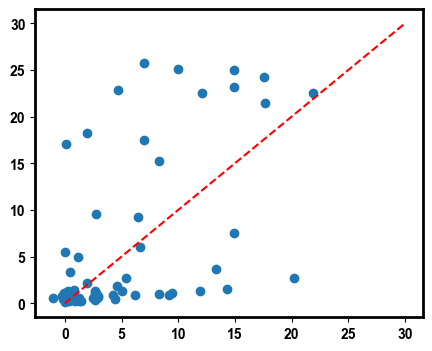

In [111]:
fig, ax = plt.subplots(figsize=(5, 4))
# pred_strength = [gp_pred, true_value]
pred_strength = np.array (pred_strength)
plt.scatter (pred_strength[:, 0], pred_strength[:, 1])
plt.plot([0, 50], [0, 50], '--r')
print (pearsonr (pred_strength[:, 0], pred_strength[:, 1]))

fig, ax = plt.subplots(figsize=(5, 4))
# pred_strength = [gp_pred, true_value]
pred_toughness = np.array (pred_toughness)
pred_toughness[:, 0]
plt.scatter (pred_toughness[:, 0], pred_toughness[:, 1])
plt.plot([0, 30], [0, 30], '--r')
pearsonr (pred_toughness[:, 0], pred_toughness[:, 1])


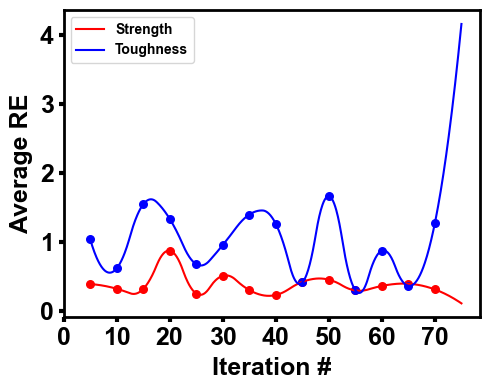

In [112]:
errors_strength_ = errors_strength0.copy()
errors_toughness_ = errors_toughness0.copy()
errors_strength = np.array(errors_strength0).reshape(len(Y_eval),1)
errors_toughness = np.array(errors_toughness0).reshape(len(Y_eval),1)

# calculates the average over every n evaluation
n = 5
iters = list(np.arange(0, len(Y_eval), n))
avgerrors_strength = np.average(errors_strength.reshape(-1, n), axis=1)
#avgerrors_strength[8] = 0.4
avgerrors_toughness = np.average(errors_toughness.reshape(-1, n), axis=1)

new_iters = np.arange(0, 70.1, 0.1)
gfg_str = make_interp_spline(iters, avgerrors_strength, k=2)
gfg_tough = make_interp_spline(iters, avgerrors_toughness, k=2)


strength_new = gfg_str(new_iters)
toughness_new = gfg_tough(new_iters)

fig, ax = plt.subplots(figsize=(5, 4))
plt.scatter (list(np.arange(0, len(Y_eval), n) + n), 
          avgerrors_strength, s=30, color='red')
plt.scatter (list(np.arange(0, len(Y_eval), n) + n), 
          avgerrors_toughness, s=30, color='blue')

plt.plot(new_iters + n, strength_new, color='red', label='Strength')
plt.plot(new_iters + n, toughness_new, color='blue', label='Toughness')
plt.legend()
ax.set_xlabel('Iteration #', fontsize='18', fontname='Arial', fontweight='bold', labelpad=5)
ax.set_ylabel('Average RE', fontsize='18', fontname='Arial', fontweight='bold', labelpad=5)

ax.tick_params(direction='out', length=3.5, width=3, colors='black', 
               grid_alpha=1, labelsize='18')
[i.set_linewidth(2) for i in ax.spines.values()]
plt.xticks((np.arange(0, 71, 10)))
plt.tight_layout()
plt.savefig('AverageRE_.png', dpi=500)